<h1> <center> GEOG 172: INTERMEDIATE GEOGRAPHICAL ANALYSIS </h1>
    <h2> <center> Evgeny Noi </h2>
        <h3> <center> Lecture 9: Correlations and Autocorrelations </h3>

# Review 

* Hypothesis tests (Null, Alternative, p-value) 
* Checking normality
* Comparing means
    * one sample (arbitrary aka assumed mean value) 
    * two samples (compare mean between the samples / groups) 
    * two samples (ANOVA) 

# Correlation 

* Visual Understanding of Correlation 
* Mathematical Understanding of Correlation 
* Statistical Modeling 

# Correlations = Linear Relationships in Data

* Linear function $y = mx + b$, where $m$ is the slope and $b$ is the $y$-intercept
* Given two points $(x_1, x_2)$ and $(y_1, y_2)$ we can calculate teh slope $\frac{y_2-y_1}{x_2 - x_1}$
* The slope describes the relationship between the variables 
    * positive slope (positive linear relationship: increase in X is associated with increase in Y) 
    * negative slope (negative linear relationship: increase in X is associated with decrease in Y) 
    * slope of 0 or near 0 (no linear relationship)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


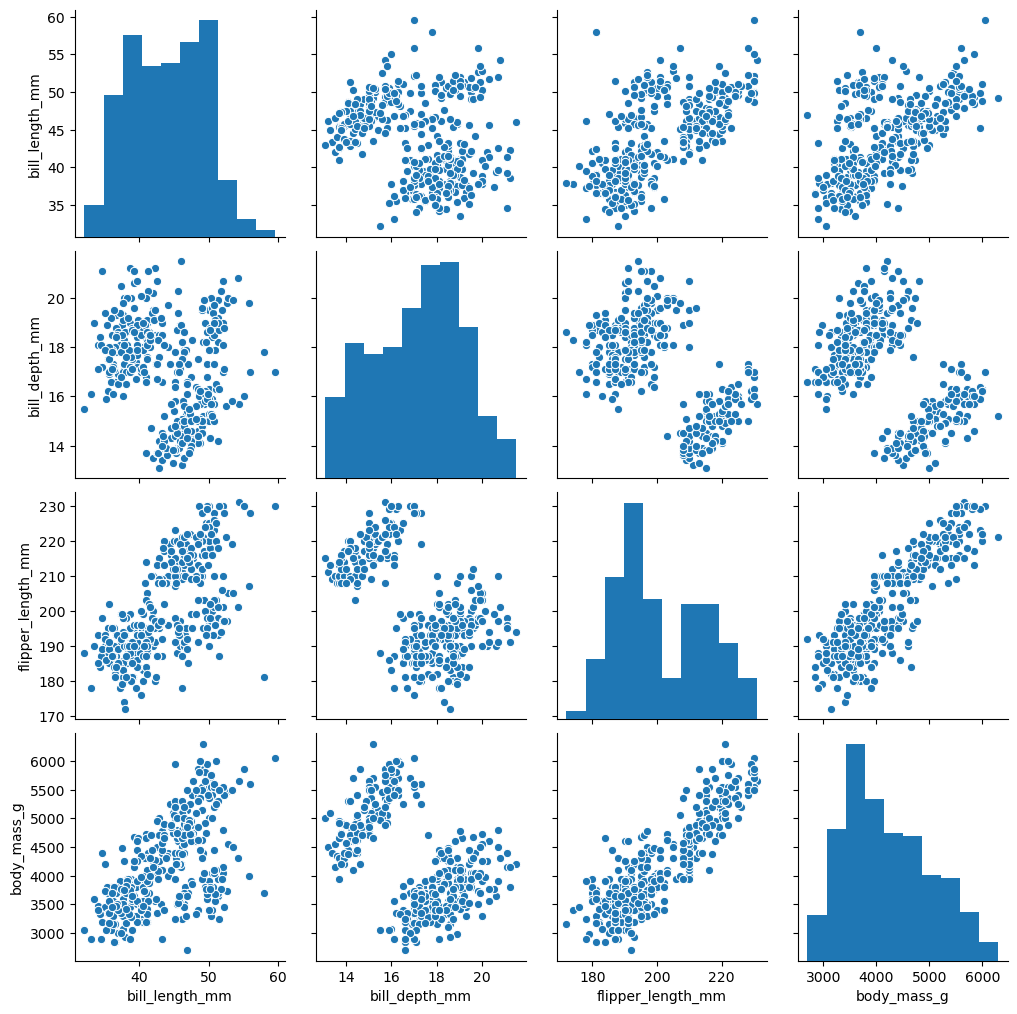

In [7]:
sns.pairplot(penguins)

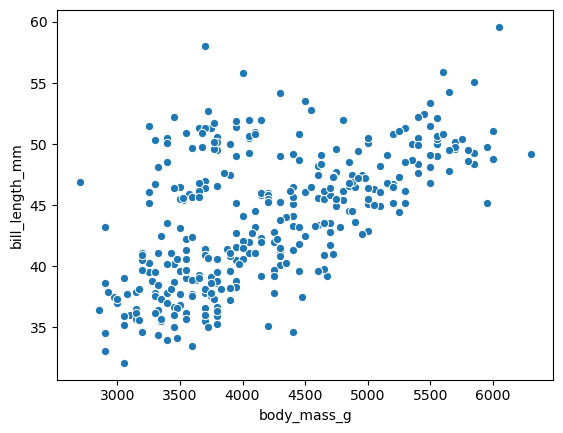

In [12]:
sns.scatterplot(x='body_mass_g', y='bill_length_mm', data=penguins);

<AxesSubplot: xlabel='body_mass_g', ylabel='bill_length_mm'>

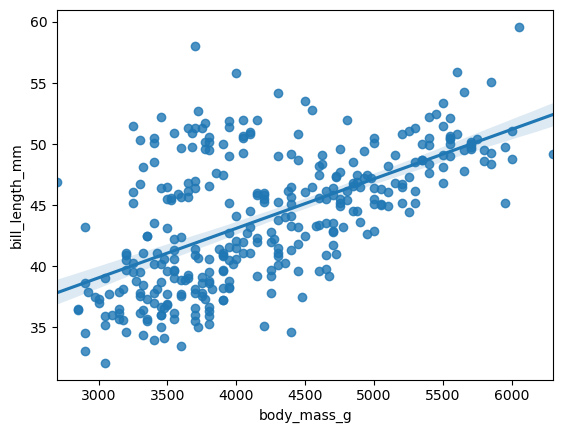

In [6]:
sns.regplot(x='body_mass_g', y='bill_length_mm', data=penguins, fit_reg=True)

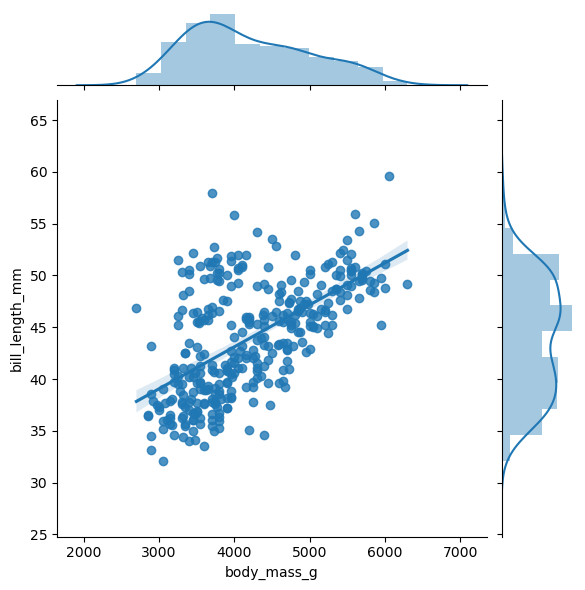

In [10]:
sns.jointplot(x='body_mass_g', y='bill_length_mm', kind='reg', data=penguins)

# Mathematical Formulation of Correlation

* Pearson's $r$ - sample and $\rho$ for population. 

$$
r=\dfrac{\sum (x_i-\bar{x})(y_i-\bar{y}) }{\sqrt{\sum (x_i-\bar{x})^2}\sqrt{\sum (y_i-\bar{y})^2}}=\frac{cov(x,y)}{\sigma_x \sigma_y}
$$

# Statistical Properties of the correlation coefficient 

* $ -1 \leq r \leq 1$ 
* The sign of the correlation provides a direction of **linear** relationship
* 0 - means no relationship
* There are no units associated with $r$ 
* The close it is to $\pm 1$ the stronger the linear relationship
* If we fit a simple linear regression model between $Y$ and $X$, then $r$ has the same sign as $\beta_1$ (coefficient of $X$ in regression equation) 
* correlation value is the same regardless of what we define as $X$ and $Y$.

In [16]:
import pingouin as pg

pg.corr(penguins.body_mass_g, penguins.bill_length_mm).round(2)

,n,r,CI95%,p-val,BF10,power
pearson,342,0.6,"[0.52, 0.66]",0.0,8.34e+30,1.0


In [17]:
# pairwise correlation
pg.pairwise_corr(penguins)

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,bill_length_mm,bill_depth_mm,pearson,two-sided,342,-0.235053,"[-0.33, -0.13]",1.119662e-05,1005.717,0.99298
1,bill_length_mm,flipper_length_mm,pearson,two-sided,342,0.656181,"[0.59, 0.71]",1.743974e-43,1.46e+40,1.00000
2,bill_length_mm,body_mass_g,pearson,two-sided,342,0.595110,"[0.52, 0.66]",3.808283e-34,8.34e+30,1.00000
3,bill_depth_mm,flipper_length_mm,pearson,two-sided,342,-0.583851,"[-0.65, -0.51]",1.232734e-32,2.679e+29,1.00000
4,bill_depth_mm,body_mass_g,pearson,two-sided,342,-0.471916,"[-0.55, -0.39]",2.276941e-20,2.103e+17,1.00000
5,flipper_length_mm,body_mass_g,pearson,two-sided,342,0.871202,"[0.84, 0.89]",4.370681e-107,1.87e+103,1.00000


C:\Users\barguzin\AppData\Local\Temp\ipykernel_29084\2552591983.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = penguins.corr() # calculate pairwise correlations


<AxesSubplot: >

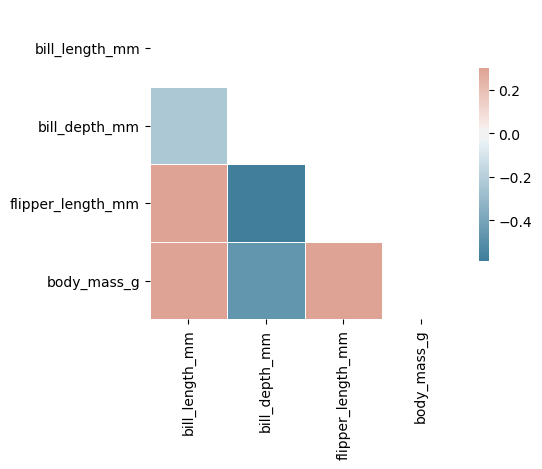

In [22]:
import numpy as np
corr = penguins.corr() # calculate pairwise correlations
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 5))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Statistical Modeling and Correlations 

* Oftentimes our data has many variables (100s, 1000s)
* If we know which of our variables are INDEPENDENT VARIABLES (predictors) and DEPENDENT VARIABLES (outcome), we can use pairwise correlations to limit the number of predictors without sacrificing much of the predictive power
    * in Statistics: use Accam's razor principle - the simplest model is preferred to the complex one (provided similar accuracy)
    * easier to interpret

# Autocorrelation

* Correlation works if we have two variables. These variables do not have any referencing (no temporal referencing no geo-referencing). **ORDER and ARRANGEMENT DO NOT MATTER**. 
* Autocorrelation - relationship to itself. Works on one referenced variable. 

# Temporal Autocorrelation



In [25]:
flights = sns.load_dataset("flights")
print(flights.shape) 
flights.head()

(144, 3)


,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [36]:
flights_wide = flights.pivot("year", "month", "passengers")
flights_wide.head()

C:\Users\barguzin\AppData\Local\Temp\ipykernel_29084\1230890992.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  flights_wide = flights.pivot("year", "month", "passengers")


month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


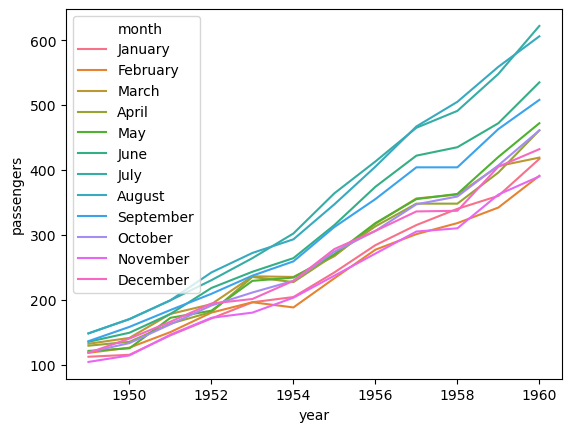

In [41]:
sns.lineplot(data=flights, x="year", y="passengers", hue="month");

<AxesSubplot: >

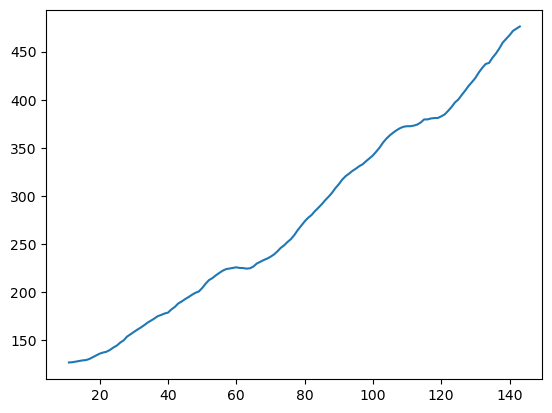

In [52]:
flights.passengers.rolling(12).mean().plot()